* adaboostu hem sınıflandırma hem de regresyon için kullanmamızı sağlar
* GBM tek bir tahminsel model formunda olan modeller serisi oluşturur
* bu seri içerisindeki bir model serideki bir önceki modelin tahmin hatalarının(residuals) üzerine kurularak oluşturulur.

In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [49]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [50]:
gbm_model

GradientBoostingClassifier()

In [51]:
y_pred = gbm_model.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

1.0

In [53]:
gbm = GradientBoostingClassifier()

In [54]:
gbm_params = {"learning_rate": [0.1, 0.001],
             "n_estimators": [100,300],
             "max_depth": [3,8]}

In [55]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, n_jobs = -1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [56]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [61]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1, n_estimators= 100, max_depth=3 ).fit(X_train, y_train)

In [62]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

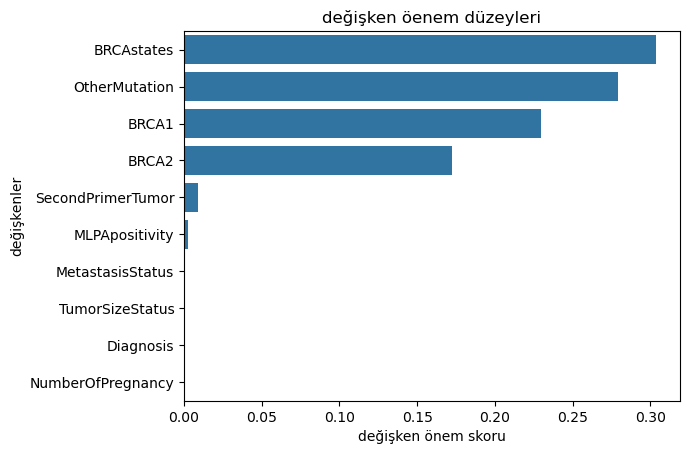

In [63]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken öenem düzeyleri")
plt.show()